In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
%matplotlib inline

In [2]:
df = pd.read_csv('commits.tsv', sep='\t', index_col='SHA')
df['When'] = df['When'].map(datetime.fromisoformat)
df['Date'] = df['When'].map(datetime.date)
min_time = df['When'].min()
df['Delta'] = df['When'].map(lambda x: (x - min_time).days)
df = df.sort_values('Delta')
df.head()

,Category,Repository,When,Name,Date,Delta
SHA,,,,,,
547f86ee,bel,pybel,2016-09-16 14:15:37+02:00,Charles Tapley Hoyt,2016-09-16,0
85a45d51,bel,pybel,2016-09-17 11:43:21+02:00,Charles Tapley Hoyt,2016-09-17,0
9ce8c705,bel,pybel,2016-09-17 11:43:13+02:00,Charles Tapley Hoyt,2016-09-17,0
45a68629,bel,pybel,2016-09-17 11:42:23+02:00,Charles Tapley Hoyt,2016-09-17,0
285071dc,bel,pybel,2016-09-17 11:41:33+02:00,Charles Tapley Hoyt,2016-09-17,0


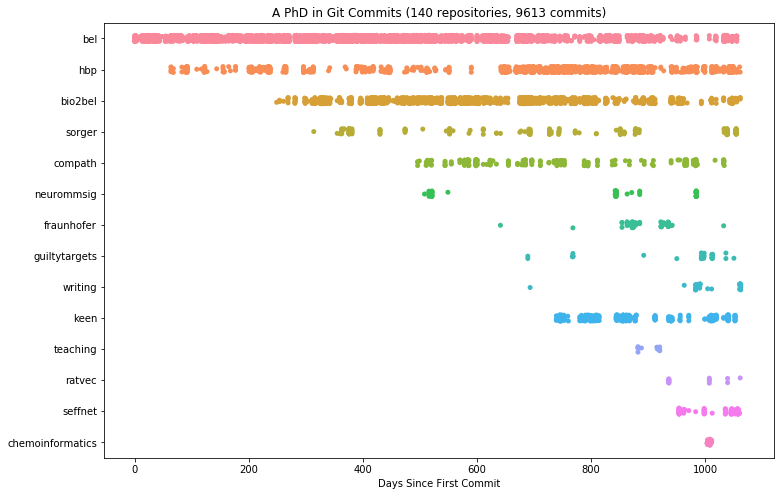

In [3]:
fix, ax = plt.subplots(1, 1, figsize=(12, 8))
sns.stripplot(x='Delta', y='Category', data=df, jitter=True)
plt.title(f'A PhD in Git Commits ({df.Repository.nunique()} repositories, {len(df)} commits)')
plt.xlabel('Days Since First Commit')
plt.ylabel('')
plt.show()